In [1]:
# import numpy and pandas, and DataFrame / Series
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

# Set some pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

# And some items for matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt
pd.options.display.mpl_style = 'default'

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


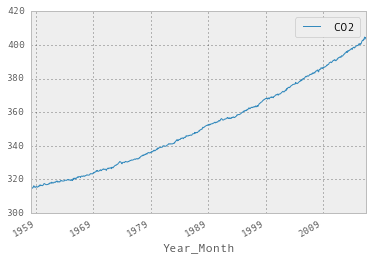

In [29]:
# load, clean and plot the data

# Atmospheric CO2 concentrations (ppm) derived from in situ air measurements
# at Mauna Loa, Observatory, Hawaii: Latitude 19.5°N Longitude 155.6°W Elevation
# 3397m

# source:
# http://scrippsco2.ucsd.edu/sites/default/files/data/in_situ_co2/monthly_mlo.csv

# load the csv by skipping the first lines of documentation and the header as 
# it is multiline one and confuses the loader regarding the types of the columns
df = pd.read_csv('monthly_mlo.csv', 
                 skiprows=57,
                 header=None,
                 names=['Year', 'Month', 'a', 'b', 'c', 'CO2', 'e', 'f', 'g', 'h'],
                 parse_dates=[[0,1]])

# to check column types, uncomment below 
# print df.dtypes

# drop the colums we don't need. For CO2 we take the __seasonally adjusted__
df.drop(df.columns[[1, 2, 3, 5, 6, 7, 8]], axis=1, inplace=True)

# drop the missing data (CO2 values -99.99)
df = df[df.CO2 > 0]

# plot the data
df.plot(x='Year_Month', y='CO2')

In [30]:
# define the logistic function, it will be fitted to the time series we have
def logistic(x, A, B, C):
    y = A / (1 + np.exp(B*x+C))
    return y

In [45]:
from scipy.optimize import curve_fit

print df.Year_Month.index
print df.CO2

popt, pcov = curve_fit(logistic, df.CO2.index, df.CO2)

print popt

Int64Index([  2,   3,   4,   6,   7,   8,  10,  11,  12,  13,
            ...
            693, 694, 695, 696, 697, 698, 699, 700, 701, 702],
           dtype='int64', length=696)
2      314.42
3      315.15
4      314.73
6      315.17
7      316.16
        ...  
698    403.27
699    404.73
700    404.27
701    404.47
702    403.69
Name: CO2, dtype: float64
[ 351.84298821  -74.81228681 -144.64725662]
